In [2]:
import pandas as pd
import numpy as np

### SGD

In [3]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

network = TwoLayerNet(...)

optimizer = SGD()



for i in range(10000):

    ...

    x_batch, t_batch = get_mini_batch(...) # 미니배치
    
    grads = network.gradient(x_batch, t_batch)
    
    params = network.params
    
    optimizer.update(params, grads)
    ...

### Momentum


In [4]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
                params[key] += self.v[key]

### AdaGrad

In [5]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key] + 1e-7))

### 가중치의 초깃값

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.random.randn(1000, 100)
node_num = 100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층 5개
activations = {}      # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

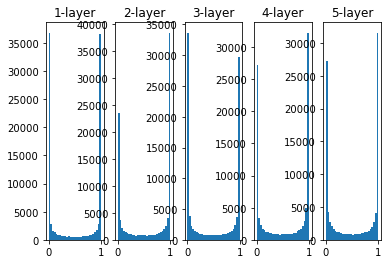

In [9]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 표준편차가 0.01인 경우

In [10]:
x = np.random.randn(1000, 100)
node_num = 100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층 5개
activations = {}      # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
#     w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

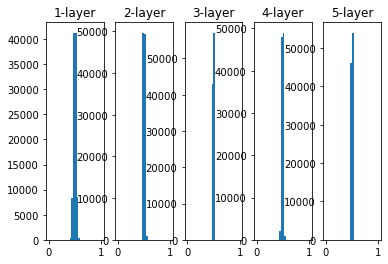

In [11]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### Xavier 초깃값

In [12]:
x = np.random.randn(1000, 100)
node_num = 100        # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층 5개
activations = {}      # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

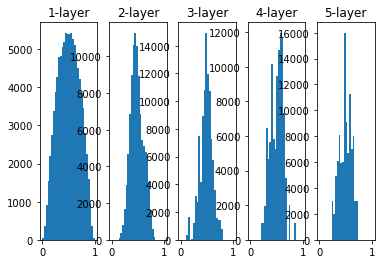

In [13]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 오버피팅

In [34]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [36]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅 재현을 위한 학습 데이터 수 줄이기
x_train = x_train[:300]
t_train = t_train[:300]

In [37]:
# 훈련 수행
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr  = 0.01) # 학습률 0.01인 SGD로 매개변수 갱신

max_epoch = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epoch:
            break

### 드롭아웃

In [40]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else : 
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

### 검증 데이터 

In [64]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터 섞기
x_train, t_train = util.shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 하이퍼 파라미터 최적화

In [75]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 * np.random.uniform(-6, -2)

print(f'weight_decay : {weight_decay}')
print(f'lr : {lr}')

weight_decay : 1.7984345655794717e-08
lr : -42.06702368961578
